Name: Busola Tega Adeaga

Student Number: 23027137

## Classification Algorithms

**Naive Bayes**

In this code, 60% of the data is used for training, and the remaining 40% is split equally into validation and test sets, each comprising 20% of the original dataset.

Cross-Validation Scores: [0.84615385 0.79326923 0.84134615 0.81089744 0.80929487 0.86217949
 0.8635634  0.60995185 0.87800963 0.8282504 ]
Mean Accuracy: 81.43%
Naive Bayes Accuracy on Test Set: 84.78%


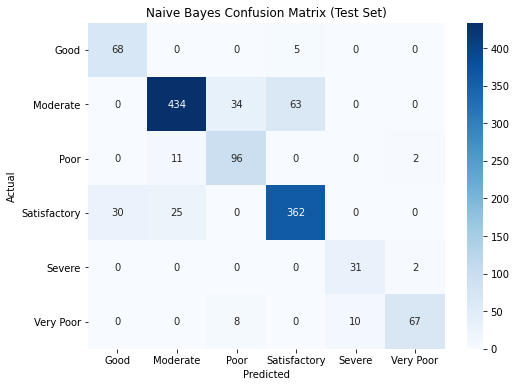

Naive Bayes Classification Report on Test Set:
              precision    recall  f1-score   support

        Good       0.69      0.93      0.80        73
    Moderate       0.92      0.82      0.87       531
        Poor       0.70      0.88      0.78       109
Satisfactory       0.84      0.87      0.85       417
      Severe       0.76      0.94      0.84        33
   Very Poor       0.94      0.79      0.86        85

    accuracy                           0.85      1248
   macro avg       0.81      0.87      0.83      1248
weighted avg       0.86      0.85      0.85      1248



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('city_day.csv')

# Handle missing values (impute with mean)
data = data.dropna()

# Encode categorical variables if any (for example, city names)
# For example: data = pd.get_dummies(data, columns=['City'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['AQI_Bucket','City', 'Date'])  # Features
y = data['AQI_Bucket']  # Target variable

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training (60%), validation (20%), and test sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the Gaussian Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Perform 10-fold cross-validation and print the cross-validation scores
cv_scores = cross_val_score(naive_bayes_classifier, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the Gaussian Naive Bayes Classifier on the training set
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_test = naive_bayes_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Naive Bayes Accuracy on Test Set: {:.2f}%".format(accuracy_test * 100))

# Generate confusion matrix for Naive Bayes on the test set
conf_matrix = confusion_matrix(y_test, predictions_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix (Test Set)')
plt.show()

# Print Naive Bayes classification report on the test set
print("Naive Bayes Classification Report on Test Set:")
print(classification_report(y_test, predictions_test))


-----------------

**C4.5 Decision Tree**

In this code, the dataset is split into three parts: 60% for training, 20% for validation, and 20% for testing. The model is trained on the training set, evaluated on the validation set for tuning hyperparameters (if necessary), and finally tested on the completely unseen test set to assess its generalization performance. This three-way split provides a robust way to evaluate the model's performance.

Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 0.99839486 1.         1.         1.        ]
Mean Accuracy: 99.98%
C4.5 Accuracy on Test Set: 99.92%


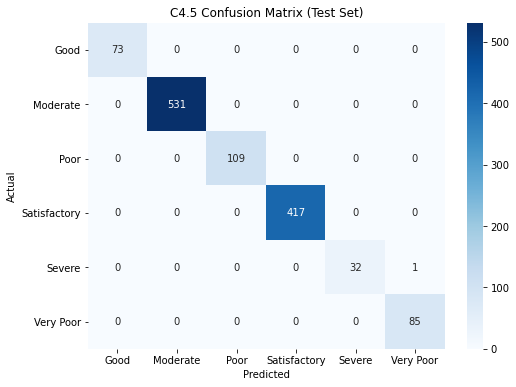

C4.5 Classification Report on Test Set:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        73
    Moderate       1.00      1.00      1.00       531
        Poor       1.00      1.00      1.00       109
Satisfactory       1.00      1.00      1.00       417
      Severe       1.00      0.97      0.98        33
   Very Poor       0.99      1.00      0.99        85

    accuracy                           1.00      1248
   macro avg       1.00      0.99      1.00      1248
weighted avg       1.00      1.00      1.00      1248



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('city_day.csv')

# Handle missing values (impute with mean)
data = data.dropna()

# Encode categorical variables if any (for example, city names)
# For example: data = pd.get_dummies(data, columns=['City'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['AQI_Bucket','City', 'Date'])  # Features
y = data['AQI_Bucket']  # Target variable

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the Decision Tree Classifier (C4.5) with entropy criterion
c45_classifier = DecisionTreeClassifier(criterion='entropy')

# Perform 10-fold cross-validation and print the cross-validation scores
cv_scores = cross_val_score(c45_classifier, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the Decision Tree Classifier on the training set
c45_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_test = c45_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("C4.5 Accuracy on Test Set: {:.2f}%".format(accuracy_test * 100))

# Generate confusion matrix for C4.5 on the test set
conf_matrix = confusion_matrix(y_test, predictions_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=c45_classifier.classes_, yticklabels=c45_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('C4.5 Confusion Matrix (Test Set)')
plt.show()

# Print C4.5 classification report on the test set
print("C4.5 Classification Report on Test Set:")
print(classification_report(y_test, predictions_test))


---------

**Random Forest**

In this code, the dataset is split into 60% for training, 20% for validation, and 20% for testing. The Random Forest model is trained on the training set, tuned using the validation set, and evaluated on the test set to assess its final performance. The Random Forest model is trained on the training set, validated on the validation set for tuning hyperparameters, and finally evaluated on the test set to assess its performance. This three-way split provides a robust way to evaluate the model's generalization performance.

Cross-Validation Scores: [0.99358974 0.99839744 0.99679487 0.99679487 0.99839744 0.99679487
 0.99839486 0.99357945 1.         0.99518459]
Mean Accuracy: 99.68%
Random Forest Accuracy on Test Set: 99.84%


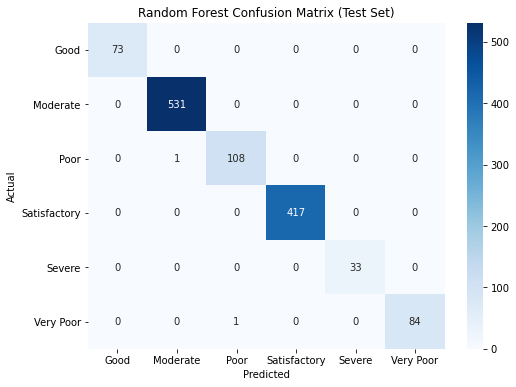

Random Forest Classification Report on Test Set:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        73
    Moderate       1.00      1.00      1.00       531
        Poor       0.99      0.99      0.99       109
Satisfactory       1.00      1.00      1.00       417
      Severe       1.00      1.00      1.00        33
   Very Poor       1.00      0.99      0.99        85

    accuracy                           1.00      1248
   macro avg       1.00      1.00      1.00      1248
weighted avg       1.00      1.00      1.00      1248



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('city_day.csv')

# Handle missing values (impute with mean)
data = data.dropna()

# Encode categorical variables if any (for example, city names)
# For example: data = pd.get_dummies(data, columns=['City'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date'])  # Features
y = data['AQI_Bucket']  # Target variable

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation and print the cross-validation scores
cv_scores = cross_val_score(random_forest_classifier, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the Random Forest Classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_test = random_forest_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Random Forest Accuracy on Test Set: {:.2f}%".format(accuracy_test * 100))

# Generate confusion matrix for Random Forest on the test set
conf_matrix = confusion_matrix(y_test, predictions_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_classifier.classes_, yticklabels=random_forest_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.show()

# Print Random Forest classification report on the test set
print("Random Forest Classification Report on Test Set:")
print(classification_report(y_test, predictions_test))


--------------

**Support Vector Model**

In this code, the dataset is split into three parts: 60% for training, 20% for validation, and 20% for testing. The SVM classifier is trained on the training set, evaluated on the validation set for tuning hyperparameters (if necessary), and finally tested on the completely unseen test set to assess its generalization performance. This three-way split provides a robust way to evaluate the model's performance.

Cross-Validation Scores: [0.99198718 1.         1.         0.99679487 0.99679487 1.
 1.         0.99678973 1.         1.        ]
Mean Accuracy: 99.82%
SVM Accuracy on Test Set: 99.44%


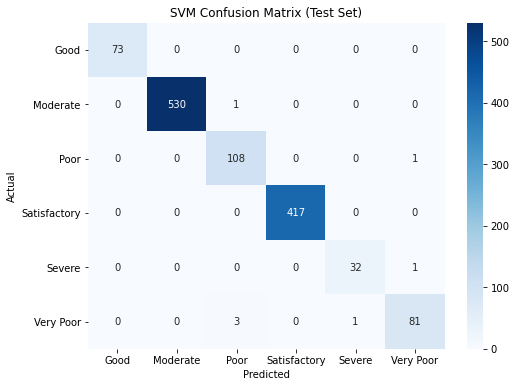

SVM Classification Report on Test Set:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        73
    Moderate       1.00      1.00      1.00       531
        Poor       0.96      0.99      0.98       109
Satisfactory       1.00      1.00      1.00       417
      Severe       0.97      0.97      0.97        33
   Very Poor       0.98      0.95      0.96        85

    accuracy                           0.99      1248
   macro avg       0.98      0.99      0.99      1248
weighted avg       0.99      0.99      0.99      1248



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('city_day.csv')

# Handle missing values (impute with mean)
data = data.dropna()

# Encode categorical variables if any (for example, city names)
# For example: data = pd.get_dummies(data, columns=['City'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['AQI_Bucket','City', 'Date'])  # Features
y = data['AQI_Bucket']  # Target variable

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the Support Vector Machine (SVM) Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Perform 10-fold cross-validation and print the cross-validation scores
cv_scores = cross_val_score(svm_classifier, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Train the SVM Classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_test = svm_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("SVM Accuracy on Test Set: {:.2f}%".format(accuracy_test * 100))

# Generate confusion matrix for SVM on the test set
conf_matrix = confusion_matrix(y_test, predictions_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix (Test Set)')
plt.show()

# Print SVM classification report on the test set
print("SVM Classification Report on Test Set:")
print(classification_report(y_test, predictions_test))


-----------

**XGBoost**

Cross-Validation Scores: [0.99839744 0.99839744 0.99839744 0.99519231 1.         0.99679487
 0.99357945 0.99678973 0.99839486 1.        ]
Mean Accuracy: 99.76%
XGBoost Accuracy on Test Set: 99.52%


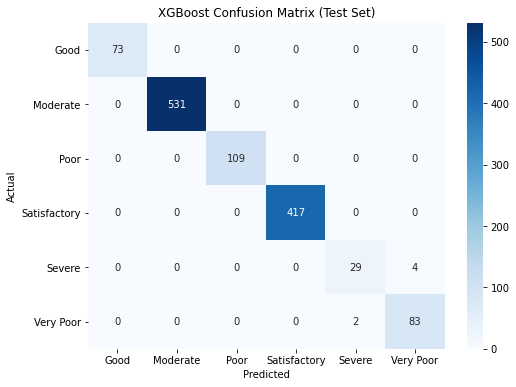

XGBoost Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       531
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00       417
           4       0.94      0.88      0.91        33
           5       0.95      0.98      0.97        85

    accuracy                           1.00      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       1.00      1.00      1.00      1248



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('city_day.csv')

# Handle missing values (impute with mean)
data = data.dropna()

# Encode categorical variables if any (for example, city names)
label_encoder = LabelEncoder()
data['AQI_Bucket'] = label_encoder.fit_transform(data['AQI_Bucket'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date'])  # Features
y = data['AQI_Bucket']  # Target variable

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Perform 10-fold cross-validation and print the cross-validation scores
cv_scores = cross_val_score(xgb_classifier, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# Split the data into training (60%), validation (20%), and test sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the XGBoost Classifier on the training set
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_test = xgb_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("XGBoost Accuracy on Test Set: {:.2f}%".format(accuracy_test * 100))

# Generate confusion matrix for XGBoost on the test set
conf_matrix = confusion_matrix(y_test, predictions_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (Test Set)')
plt.show()

# Print XGBoost classification report on the test set
print("XGBoost Classification Report on Test Set:")
print(classification_report(y_test, predictions_test))


In this code, cross_val_score is used to perform 10-fold cross-validation on your Decision Tree Classifier. The cross-validation scores are printed, and the mean accuracy is calculated. After cross-validation, the model is trained and evaluated on the test set as before. Make sure to adjust the number of folds (cv=10) in cross_val_score according to your preference or dataset size.

----------------------

# Model Comparisons 

**ANOVA**

In [5]:
from scipy.stats import f_oneway

# Accuracies for each model (replace these with your actual accuracy values)
naive_bayes_acc = [84.78, 81.43]  # Add more accuracy values for Naive Bayes
c45_acc = [99.92, 99.98]  # Add more accuracy values for C4.5
random_forest_acc = [99.84, 99.68]  # Add more accuracy values for Random Forest
svm_acc = [99.44, 99.82]  # Add more accuracy values for SVM
xgboost_acc = [99.52, 99.76]  # Add more accuracy values for XGBoost

# Perform ANOVA test
f_statistic, p_value = f_oneway(naive_bayes_acc, c45_acc, random_forest_acc, svm_acc, xgboost_acc)
rounded_f_statistic = round(f_statistic, 2)
rounded_p_value = round(p_value, 2)

# Print results
print("F-Statistic:", rounded_f_statistic)
print("P-Value:", rounded_p_value)


F-Statistic: 96.73
P-Value: 0.0


**t-test**

In [8]:
from scipy.stats import ttest_ind

# Perform t-tests
t_statistic, p_value = ttest_ind(naive_bayes_acc, c45_acc)
rounded_t_statistic = round(t_statistic, 2)
rounded_p_value = round(p_value, 2)
print("Naive Bayes vs. C4.5 - T-Statistic:", rounded_t_statistic, "P-Value:", rounded_p_value)

t_statistic, p_value = ttest_ind(naive_bayes_acc, random_forest_acc)
rounded_t_statistic = round(t_statistic, 2)
rounded_p_value = round(p_value, 2)
print("Naive Bayes vs. Random Forest - T-Statistic:", rounded_t_statistic, "P-Value:", rounded_p_value)

# Perform other pairwise t-tests similarly for other models
# Perform t-tests for Naive Bayes vs XGBoost
t_statistic, p_value = ttest_ind(naive_bayes_acc, xgboost_acc)
rounded_t_statistic = round(t_statistic, 2)
rounded_p_value = round(p_value, 2)
print("Naive Bayes vs. XGBoost - T-Statistic:", rounded_t_statistic, "P-Value:", rounded_p_value)

# Perform t-tests for Naive Bayes vs SVM
t_statistic, p_value = ttest_ind(naive_bayes_acc, svm_acc)
rounded_t_statistic = round(t_statistic, 2)
rounded_p_value = round(p_value, 2)
print("Naive Bayes vs. SVM - T-Statistic:", rounded_t_statistic, "P-Value:", rounded_p_value)


Naive Bayes vs. C4.5 - T-Statistic: -10.06 P-Value: 0.01
Naive Bayes vs. Random Forest - T-Statistic: -9.93 P-Value: 0.01
Naive Bayes vs. XGBoost - T-Statistic: -9.85 P-Value: 0.01
Naive Bayes vs. SVM - T-Statistic: -9.8 P-Value: 0.01
